<a href="https://colab.research.google.com/github/TanushreeBose26/data-projects/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rcParams['font.size']=14
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)

We will see the highest corelation of the variables with our target column Price.

In [7]:
bos = pd.read_csv('BostonHousing.csv')
bos.head()

,crime_rate,industrial_perc,close_to_charles_river,nitric_oxide,avg_num_rooms,age,dist_frm_employment_center,pupil_teacher_ratio,perc_low_income_group,avg_house_price
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,18.7,5.33,36.2


we are going tocreat the correlation of all our variables with our target column 'Price'.
Lets choose one best column to create simple linear relation with Avg House Price


In [8]:
bos.corrwith(bos.avg_house_price)

crime_rate                   -0.388305
industrial_perc              -0.483725
close_to_charles_river        0.175260
nitric_oxide                 -0.427321
avg_num_rooms                 0.695360
age                          -0.376955
dist_frm_employment_center    0.249929
pupil_teacher_ratio          -0.507787
perc_low_income_group        -0.737663
avg_house_price               1.000000
dtype: float64

The column which has the highest corelation with our target variable is perc_low_income_group (as we take the absolute value)

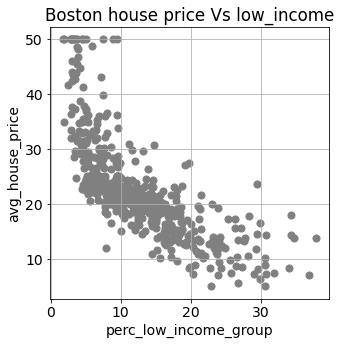

In [9]:
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

It's not a perfect line as the points are scattered around.

For the equation y=mx+c+error, we will see the best fit line.

we will see which value has the We will randomely choose three different values of the variable which has the highest correlation with our target variable.

Let's find the best fit line (equation) given the data

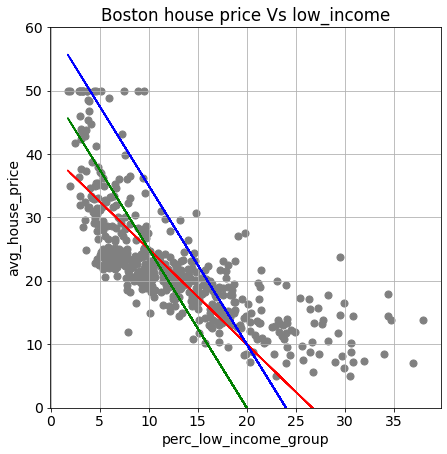

In [10]:
plt.figure(figsize=(7,7))
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
y_pred = -1.5*bos.perc_low_income_group + 40
plt.plot(bos.perc_low_income_group, y_pred, c='r')
y_pred = -2.5*bos.perc_low_income_group + 60
plt.plot(bos.perc_low_income_group, y_pred, c='b')
y_pred = -2.5*bos.perc_low_income_group + 50
plt.plot(bos.perc_low_income_group, y_pred, c='g')

plt.ylim((0, 60))
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

The way to find the best line is to see which line has the least amount of errors.
The best fit line will pass through the mean of the X and Y value.

Let's get the mean of X and Y

In [11]:
x_mean = bos.perc_low_income_group.mean()
x_mean

12.653063241106722

In [12]:
y_mean = bos.avg_house_price.mean()
y_mean

22.532806324110677

Now we will add the X and Y mean to our scatter plot and get the point and denote it with a star.

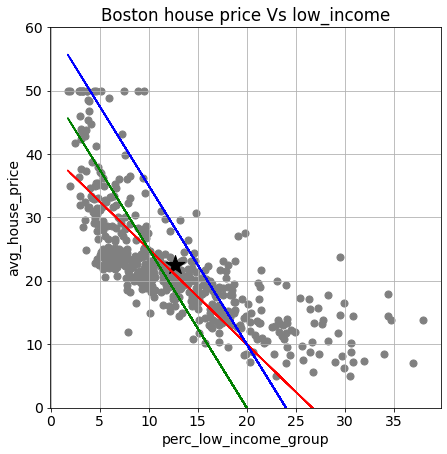

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
y_pred = -1.5*bos.perc_low_income_group + 40
plt.plot(bos.perc_low_income_group, y_pred, c='r')
y_pred = -2.5*bos.perc_low_income_group + 60
plt.plot(bos.perc_low_income_group, y_pred, c='b')
y_pred = -2.5*bos.perc_low_income_group + 50
plt.plot(bos.perc_low_income_group, y_pred, c='g')
plt.scatter(x_mean, y_mean, c='k', marker = '*', s=400)

plt.ylim((0, 60))
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

hence we can see that our best fit line is red which is passing through the star.

Now let's solve the slope.


In [14]:
cov_mat = np.cov(bos.perc_low_income_group, bos.avg_house_price, ddof=1)
cov_mat

array([[ 50.99475951, -48.44753832],
       [-48.44753832,  84.58672359]])

*The first value 50.9947 tells us the variance of perc_low_income_group.

*-48.447 is the covariance of the avg_house_price.

*In second line -48.447 is again the covariance of the perc_low_income_group.

*and the second line second value 84.5867 is the variance of avg_house_income.

In [15]:
m = cov_mat[0, 1] / cov_mat[0, 0]
m

-0.950049353757991

The above is our slope value.

In [16]:
c = y_mean - m*x_mean
c

34.55384087938311

The above is our intercept value.

**Now, let's plot the final graph** 

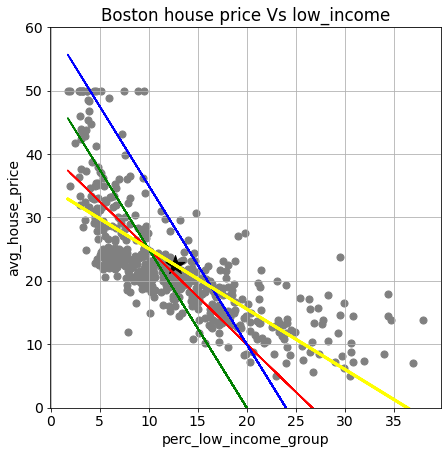

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(bos.perc_low_income_group, bos.avg_house_price, c='grey', marker = 'o', s=50)
y_pred = -1.5*bos.perc_low_income_group + 40
plt.plot(bos.perc_low_income_group, y_pred, c='r')
y_pred = -2.5*bos.perc_low_income_group + 60
plt.plot(bos.perc_low_income_group, y_pred, c='b')
y_pred = -2.5*bos.perc_low_income_group + 50
plt.plot(bos.perc_low_income_group, y_pred, c='g')

y_pred = m*bos.perc_low_income_group + c # Our final prediction
plt.plot(bos.perc_low_income_group, y_pred, c='yellow', lw =3)

plt.scatter(x_mean, y_mean, c='k', marker = '*', s=400)

plt.ylim((0, 60))
plt.xlabel('perc_low_income_group')
plt.ylabel('avg_house_price')
plt.title('Boston house price Vs low_income')
plt.show()

Here, yellow line is our final line. it is the line with the lease no. of errors. and it is passing through the star we plotted.

**Lets evaluate the quality of our prediction**

In [18]:
y_actual = bos.avg_house_price
y_pred = m*bos.perc_low_income_group + c # Our final prediction
n = len(y_actual)

In [19]:
mse = np.sum((y_actual-y_pred)**2)/n
mse

38.48296722989415

In [20]:
mae = np.sum(np.abs(y_actual-y_pred))/n
mae

4.505281166250568

In [21]:
rmse = np.sqrt(mse)
rmse

6.20346413142642

In [22]:
ssr = np.sum((y_pred- y_mean)**2)
sse = np.sum((y_actual-y_pred)**2)
sst = np.sum((y_actual-y_mean)**2)

In [23]:
r_square  = ssr/sst
r_square

0.5441462975864798

In [24]:
r_square  = ssr/(ssr +sse)
r_square

0.5441462975864798

In [25]:
r_square  = 1-(sse/sst)
r_square

0.5441462975864797

Let's see other variables now.

In [26]:
import statsmodels.formula.api as SM

In [27]:
formula_MLR ='avg_house_price~crime_rate+industrial_perc+close_to_charles_river+nitric_oxide+avg_num_rooms+age+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [28]:
model = SM.ols(formula = formula_MLR, data=bos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.09e-130
Time:                        18:07:51   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* avg_num_rooms has positive coefficient as expected.
* perc_low_income_group has negative coefficient.
* here we cant directly compare the coefficient value of nitric_oxide with the price because it has decimal values and avg_house_price has tens values as well. as we have not scaled our values.


In [29]:
rsqr = model.rsquared
rsqr

0.7191918531783886

In [30]:
n

506

In [31]:
k = 9

In [32]:
rsqr_adj = 1 - ( (1-rsqr)* (n-1)/(n-k-1) )
rsqr_adj

0.7140965440626739

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.09e-130
Time:                        18:07:51   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
residuals = model.resid

In [35]:
predictions = model.predict(bos)

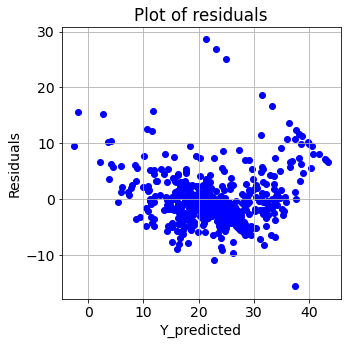

In [36]:
plt.scatter(predictions, residuals, c='blue')
plt.title('Plot of residuals')
plt.xlabel('Y_predicted')
plt.ylabel('Residuals')
plt.show()

*we can see cetain pattern here.
*the variance is different in each zone. its called homoscedesticity.
*multi collinearity is there, its not good.


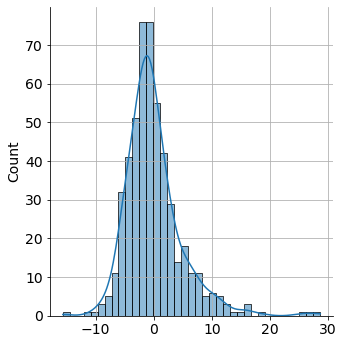

In [37]:
sns.displot(residuals, kde = True)
plt.show()

* distribution of residual is very important.

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.09e-130
Time:                        18:07:52   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*The p-value for the variable 'age' and the variable 'industrial_perc' is high. These variables are statistically not important. But we need to understand these variables from a business point of view and then only drop the variables if required.
* here we have multicolinearity problem. so lets handle it first.

In [40]:
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [41]:
vif_cal(input_data= bos.drop('avg_house_price', axis=1))

crime_rate  VIF =  1.38
industrial_perc  VIF =  3.16
close_to_charles_river  VIF =  1.05
nitric_oxide  VIF =  3.83
avg_num_rooms  VIF =  1.79
age  VIF =  3.01
dist_frm_employment_center  VIF =  3.25
pupil_teacher_ratio  VIF =  1.38
perc_low_income_group  VIF =  2.85


Let us consider 2 as the VIF threshold value.
we will drop the nitric_oxide and check the VIF value again.

In [42]:
formula_MLR1 ='avg_house_price~crime_rate+industrial_perc+close_to_charles_river+avg_num_rooms+age+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [43]:
model1 = SM.ols(formula = formula_MLR1, data=bos).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     151.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          6.95e-128
Time:                        18:18:49   Log-Likelihood:                -1528.1
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     497   BIC:                             3112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     24.8489      4.094      6.070      0.000      16.806      32.892
crime_rate                    -0.0819      0.030     -2.712      0.007      -0.141      -0.023
industrial_perc               -0.1565      0.053     -2.971      0.003      -0.260      -0.053
close_to_charles_river         3.0960      0.900      3.440      0.001       1.328       4.864
avg_num_rooms                  4.2326      0.424      9.993      0.000       3.400       5.065
age                           -0.0207      0.013     -1.560      0.119      -0.047       0.005
dist_frm_employment_center    -0.9877      0.181     -5.464      0.000      -1.343      -0.633
pupil_teacher_ratio           -0.8061      0.117     -6.877      0.000      -1.036      -0.576
perc_low_income_group         -0.5569      0.052    -10.648      0.000      -0.660      -0.454
==============================================================================
Omnibus:                      185.940   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.398
Skew:                           1.559   Prob(JB):                    1.11e-196
Kurtosis:                       8.752   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
vif_cal(input_data= bos.drop(['avg_house_price', 'nitric_oxide'], axis=1))

crime_rate  VIF =  1.36
industrial_perc  VIF =  2.63
close_to_charles_river  VIF =  1.05
avg_num_rooms  VIF =  1.79
age  VIF =  2.82
dist_frm_employment_center  VIF =  2.92
pupil_teacher_ratio  VIF =  1.3
perc_low_income_group  VIF =  2.81


In [47]:
formula_MLR2 ='avg_house_price~crime_rate+industrial_perc+close_to_charles_river+avg_num_rooms+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [48]:
model2 = SM.ols(formula = formula_MLR2, data=bos).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     171.9
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.71e-128
Time:                        18:22:33   Log-Likelihood:                -1529.4
No. Observations:                 506   AIC:                             3075.
Df Residuals:                     498   BIC:                             3109.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     24.1691      4.076      5.929      0.000      16.160      32.178
crime_rate                    -0.0798      0.030     -2.641      0.009      -0.139      -0.020
industrial_perc               -0.1658      0.052     -3.165      0.002      -0.269      -0.063
close_to_charles_river         3.0111      0.900      3.347      0.001       1.244       4.779
avg_num_rooms                  4.1225      0.418      9.857      0.000       3.301       4.944
dist_frm_employment_center    -0.8444      0.156     -5.416      0.000      -1.151      -0.538
pupil_teacher_ratio           -0.8120      0.117     -6.922      0.000      -1.042      -0.582
perc_low_income_group         -0.5870      0.049    -12.057      0.000      -0.683      -0.491
==============================================================================
Omnibus:                      178.255   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.516
Skew:                           1.510   Prob(JB):                    1.64e-176
Kurtosis:                       8.410   Cond. No.                         501.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif_cal(input_data= bos.drop(['avg_house_price', 'nitric_oxide', 'age'], axis=1))

crime_rate  VIF =  1.36
industrial_perc  VIF =  2.6
close_to_charles_river  VIF =  1.05
avg_num_rooms  VIF =  1.74
dist_frm_employment_center  VIF =  2.17
pupil_teacher_ratio  VIF =  1.3
perc_low_income_group  VIF =  2.43


In [50]:
formula_MLR3 ='avg_house_price~crime_rate+close_to_charles_river+avg_num_rooms+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [51]:
model3 = SM.ols(formula = formula_MLR3, data=bos).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.63e-127
Time:                        18:27:08   Log-Likelihood:                -1534.4
No. Observations:                 506   AIC:                             3083.
Df Residuals:                     499   BIC:                             3112.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     22.0240      4.056      5.430      0.000      14.056      29.992
crime_rate                    -0.0868      0.030     -2.853      0.005      -0.147      -0.027
close_to_charles_river         2.7839      0.905      3.077      0.002       1.006       4.561
avg_num_rooms                  4.2846      0.419     10.230      0.000       3.462       5.107
dist_frm_employment_center    -0.5595      0.128     -4.357      0.000      -0.812      -0.307
pupil_teacher_ratio           -0.8848      0.116     -7.623      0.000      -1.113      -0.657
perc_low_income_group         -0.6200      0.048    -12.922      0.000      -0.714      -0.526
==============================================================================
Omnibus:                      168.465   Durbin-Watson:                   1.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.889
Skew:                           1.439   Prob(JB):                    1.75e-157
Kurtosis:                       8.095   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_cal(input_data= bos.drop(['avg_house_price', 'nitric_oxide', 'age', 'industrial_perc'], axis=1))

crime_rate  VIF =  1.35
close_to_charles_river  VIF =  1.04
avg_num_rooms  VIF =  1.71
dist_frm_employment_center  VIF =  1.45
pupil_teacher_ratio  VIF =  1.25
perc_low_income_group  VIF =  2.32


In [53]:
formula_MLR4 ='avg_house_price~crime_rate+close_to_charles_river+avg_num_rooms+dist_frm_employment_center+pupil_teacher_ratio'

In [54]:
model4 = SM.ols(formula = formula_MLR4, data=bos).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.76e-97
Time:                        18:32:40   Log-Likelihood:                -1607.4
No. Observations:                 506   AIC:                             3227.
Df Residuals:                     500   BIC:                             3252.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.2038      4.052     -1.037      0.300     -12.166       3.758
crime_rate                    -0.1972      0.034     -5.853      0.000      -0.263      -0.131
close_to_charles_river         3.1328      1.044      3.002      0.003       1.082       5.183
avg_num_rooms                  7.2978      0.401     18.177      0.000       6.509       8.087
dist_frm_employment_center     0.0783      0.137      0.572      0.567      -0.191       0.347
pupil_teacher_ratio           -1.0256      0.133     -7.691      0.000      -1.288      -0.764
==============================================================================
Omnibus:                      220.630   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1816.415
Skew:                           1.695   Prob(JB):                         0.00
Kurtosis:                      11.641   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif_cal(input_data= bos.drop(['avg_house_price', 'nitric_oxide', 'age', 'industrial_perc', 'perc_low_income_group'], axis=1))

crime_rate  VIF =  1.25
close_to_charles_river  VIF =  1.04
avg_num_rooms  VIF =  1.18
dist_frm_employment_center  VIF =  1.23
pupil_teacher_ratio  VIF =  1.24


* though the VIF values are under the threshold and the p_values are good, but adjusted r square has fallen a lot. so we will not consider dropping perc-low_income_group. and hence we can stop with final variables 'crime_rate, close_to_charles_river, avg_num_rooms, dist_frm_employment_center, pupil_teacher_ratio, perc_low_income_group'. 

In [57]:
model_pred = model.fittedvalues
model3_pred = model3.fittedvalues

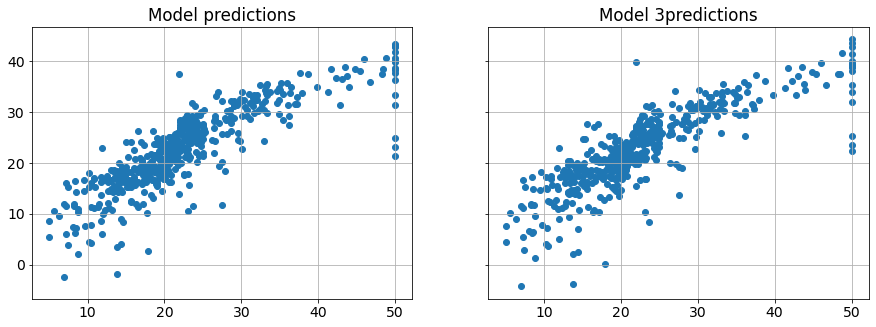

In [58]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(bos['avg_house_price'], model_pred)
ax1.set_title('Model predictions')

ax2.scatter(bos['avg_house_price'],model3_pred)
ax2.set_title('Model 3predictions')
plt.show()

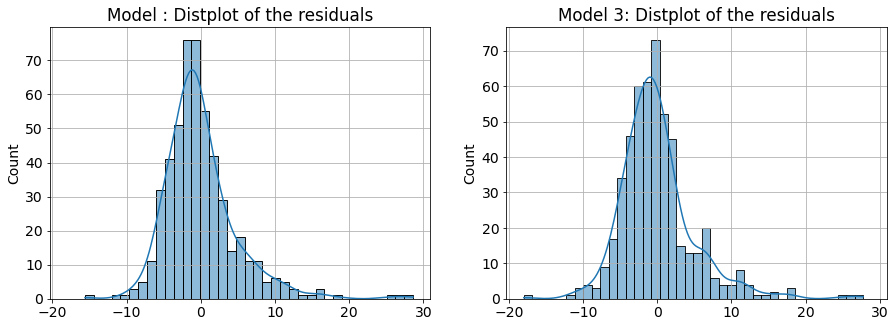

In [59]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.histplot(model.resid, ax=a[0][0], kde=True)
a[0][0].set_title('Model : Distplot of the residuals')

plot_1 = sns.histplot(model3.resid, ax=a[0][1], kde=True)
a[0][1].set_title('Model 3: Distplot of the residuals')
plt.show()


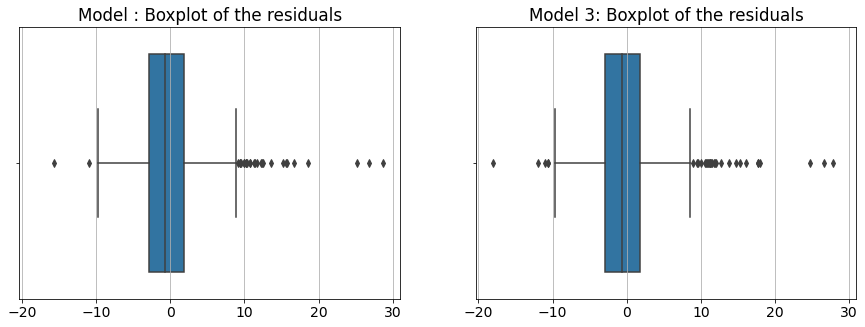

In [60]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.boxplot(x= model.resid, ax=a[0][0])
a[0][0].set_title('Model : Boxplot of the residuals')

plot_1 = sns.boxplot(x = model3.resid, ax=a[0][1])
a[0][1].set_title('Model 3: Boxplot of the residuals')
plt.show()


In [62]:
from sklearn import metrics

In [63]:
metrics.mean_squared_error(bos['avg_house_price'], model_pred, squared=False)

4.868849876481693

In [64]:
metrics.mean_squared_error(bos['avg_house_price'], model3_pred, squared=False)

5.020394390453027

* Though the rmse value of 'model' is better den model 3' but still we will consider model 3' because in model there is presence of multicollinarity.

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
X = bos.drop('avg_house_price', axis=1)
Y = bos['avg_house_price']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [72]:
model_3 = lr.fit(X_train[['crime_rate', 'close_to_charles_river', 'avg_num_rooms', 
                          'dist_frm_employment_center', 'pupil_teacher_ratio', 'perc_low_income_group']], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [73]:
#Training Data Prediction
model_3_pred_train = model_3.predict(X_train[['crime_rate', 'close_to_charles_river', 'avg_num_rooms', 
                          'dist_frm_employment_center', 'pupil_teacher_ratio', 'perc_low_income_group']])

In [74]:
#Test Data Prediction
model_3_pred_test = model_3.predict(X_test[['crime_rate', 'close_to_charles_river', 'avg_num_rooms', 
                          'dist_frm_employment_center', 'pupil_teacher_ratio', 'perc_low_income_group']])

In [75]:
print('Training Data RMSE of model_3:',metrics.mean_squared_error(Y_train,model_3_pred_train,squared=False))
print('Test Data RMSE of model_3:',metrics.mean_squared_error(Y_test,model_3_pred_test,squared=False))

Training Data RMSE of model_3: 5.18753462533894
Test Data RMSE of model_3: 4.749265993059112


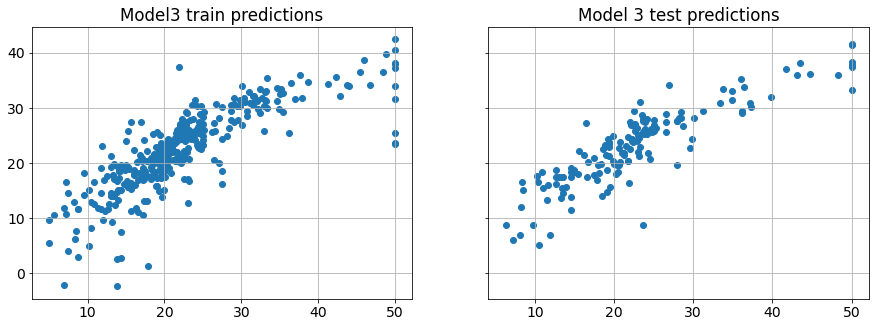

In [77]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(Y_train,model_3_pred_train)
ax1.set_title('Model3 train predictions')

ax2.scatter(Y_test,model_3_pred_test)
ax2.set_title('Model 3 test predictions')
plt.show()

# New Section